## Part 1: Introduction to the Dataset
Based On the README(1).md file in the directory, we can discuss : "What is the dataset about?  How has it been used?"
let's summarize what the dataset is about and how it has been used based on the README file:

**What is the dataset about?**
- It is a dataset collected to study Quality of Experience (QoE) of mobile video streaming from a user perspective. 
- 181 users viewed videos on mobile devices over cellular networks and rated the quality on a 1-5 Mean Opinion Score (MOS).
- It contains 1560 samples with 29 features covering video quality, network conditions, device details, user profile, etc.
- The goal was to quantify the impact of various "Quality of Experience Influence Factors" on the perceived quality of experience.

**How has it been used?**
- Used by Orange telecom to correlate network Quality of Service to video streaming QoE. 
- Used in a research paper to demonstrate the methodology for crowdsourced QoE evaluation.
- Can be used to build models to predict video streaming QoE from measurable factors. 
- Provides real-world data to analyze interactions between the many factors impacting QoE.
- Allows benchmarking QoE across different network types, video parameters, devices, etc.

In summary, it is a rich dataset focused on modeling and predicting mobile video streaming quality of experience based on crowdsourced subjective evaluations.

## Part 2: Data Exploration

**Let's Characterize and Understand Our dataset**

◦ Via data exploration
◦ But, let's not report everything we found: only report what we think is useful or interesting to observe.
◦ Let's also Explain the meaning of the columns and the values

In [2]:
# let's import some basic libraries first 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# let's read the data
df = pd.read_csv('pokemon.csv')

# let's see the first 5 rows of the data
df.head()

,id,user_id,QoA_VLCresolution,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,...,QoD_os-version,QoD_api-level,QoU_sex,QoU_age,QoU_Ustedy,QoF_begin,QoF_shift,QoF_audio,QoF_video,MOS
0,590,71,360,528.39294,24.950000,0,43.800000,0,2,683,...,4.1.1(122573.16),16,1,20,5,3,5,3,4,3
1,428,46,360,402.64664,30.066667,0,44.200000,0,2,690,...,4.4.2(I9195XXUCNK1),19,1,25,5,4,5,5,5,5
2,406,44,360,735.84070,24.200000,0,44.183333,0,2,840,...,4.1.2(I9300XXELL4),16,1,22,5,3,5,4,4,4
3,1256,133,240,529.48830,24.116667,9,43.850000,0,2,868,...,4.4.4(suv3Rw),19,1,31,5,4,5,5,5,5
4,244,22,360,736.00085,24.066667,0,43.850000,0,2,869,...,4.1.2(I9300XXELL4),16,0,26,5,5,5,4,5,5


In [3]:
# let's see the last 5 rows of the data
df.tail()

,id,user_id,QoA_VLCresolution,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,...,QoD_os-version,QoD_api-level,QoU_sex,QoU_age,QoU_Ustedy,QoF_begin,QoF_shift,QoF_audio,QoF_video,MOS
1538,881,113,360,37.281925,2.300000,1,4.216667,1,2,120628,...,4.4.4(suv3Rw),19,1,26,5,1,1,1,3,1
1539,908,117,360,43.191174,12.950000,24,19.016667,3,3,123318,...,4.4.4(suv3Rw),19,0,29,5,1,1,2,1,1
1540,1774,168,360,58.460570,4.250000,4,8.416667,1,4,123430,...,5.0(G900FXXU1BOC2),21,1,27,5,1,1,1,1,1
1541,67,3,360,47.591620,0.133333,1,19.600000,2,3,139610,...,4.1.1(122573.16),16,1,27,5,1,1,1,1,1
1542,1147,128,360,43.528040,6.633333,12,12.133333,0,4,329271,...,4.4.4(suv3Rw),19,1,27,5,1,1,1,1,1


In [4]:
# let's see the shape of the data
df.shape

(1543, 23)

In [5]:
# let's see the columns of the data
df.columns

Index(['id', 'user_id', 'QoA_VLCresolution', 'QoA_VLCbitrate',
       'QoA_VLCframerate', 'QoA_VLCdropped', 'QoA_VLCaudiorate',
       'QoA_VLCaudioloss', 'QoA_BUFFERINGcount', 'QoA_BUFFERINGtime',
       'QoS_type', 'QoS_operator', 'QoD_model', 'QoD_os-version',
       'QoD_api-level', 'QoU_sex', 'QoU_age', 'QoU_Ustedy', 'QoF_begin',
       'QoF_shift', 'QoF_audio', 'QoF_video', 'MOS'],
      dtype='object')

In [6]:
# let's see the data types of the columns
df.dtypes

id                      int64
user_id                 int64
QoA_VLCresolution       int64
QoA_VLCbitrate        float64
QoA_VLCframerate      float64
QoA_VLCdropped          int64
QoA_VLCaudiorate      float64
QoA_VLCaudioloss        int64
QoA_BUFFERINGcount      int64
QoA_BUFFERINGtime       int64
QoS_type                int64
QoS_operator            int64
QoD_model              object
QoD_os-version         object
QoD_api-level           int64
QoU_sex                 int64
QoU_age                 int64
QoU_Ustedy              int64
QoF_begin               int64
QoF_shift               int64
QoF_audio               int64
QoF_video               int64
MOS                     int64
dtype: object

In [7]:
# let's see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1543 non-null   int64  
 1   user_id             1543 non-null   int64  
 2   QoA_VLCresolution   1543 non-null   int64  
 3   QoA_VLCbitrate      1543 non-null   float64
 4   QoA_VLCframerate    1543 non-null   float64
 5   QoA_VLCdropped      1543 non-null   int64  
 6   QoA_VLCaudiorate    1543 non-null   float64
 7   QoA_VLCaudioloss    1543 non-null   int64  
 8   QoA_BUFFERINGcount  1543 non-null   int64  
 9   QoA_BUFFERINGtime   1543 non-null   int64  
 10  QoS_type            1543 non-null   int64  
 11  QoS_operator        1543 non-null   int64  
 12  QoD_model           1543 non-null   object 
 13  QoD_os-version      1543 non-null   object 
 14  QoD_api-level       1543 non-null   int64  
 15  QoU_sex             1543 non-null   int64  
 16  QoU_ag

In [8]:
# let's see the summary statistics of the data
df.describe()

,id,user_id,QoA_VLCresolution,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,...,QoS_operator,QoD_api-level,QoU_sex,QoU_age,QoU_Ustedy,QoF_begin,QoF_shift,QoF_audio,QoF_video,MOS
count,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,...,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000
mean,924.261180,98.128321,354.566429,520.522257,25.001576,1.217758,40.379790,0.235256,1.392093,6164.184705,...,3.051199,18.560596,0.855476,29.179520,4.882048,3.533377,4.523655,3.738820,3.884640,3.702528
std,525.492253,50.668531,25.939930,350.957926,6.690082,5.618366,9.123582,1.133616,0.895943,15032.225559,...,0.975363,1.642513,0.351734,8.006615,0.471312,1.025622,0.953146,1.006382,0.887098,1.056283
min,52.000000,1.000000,16.000000,0.003294,0.000000,0.000000,0.000000,0.000000,1.000000,683.000000,...,1.000000,15.000000,0.000000,14.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,472.500000,53.000000,360.000000,307.668850,24.733333,0.000000,43.783333,0.000000,1.000000,2010.500000,...,3.000000,19.000000,1.000000,25.000000,5.000000,3.000000,4.000000,3.000000,4.000000,3.000000
50%,897.000000,117.000000,360.000000,474.000920,25.316667,0.000000,44.150000,0.000000,1.000000,2719.000000,...,3.000000,19.000000,1.000000,27.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000
75%,1298.500000,135.000000,360.000000,661.491925,29.800000,1.000000,44.466667,0.000000,2.000000,4067.000000,...,4.000000,19.000000,1.000000,30.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000
max,2077.000000,181.000000,360.000000,3918.293500,31.316667,107.000000,46.000000,14.000000,10.000000,329271.000000,...,4.000000,22.000000,1.000000,55.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
# let's see the unique values of the columns 
df.nunique()

id                    1543
user_id                181
QoA_VLCresolution        3
QoA_VLCbitrate        1535
QoA_VLCframerate       309
QoA_VLCdropped          35
QoA_VLCaudiorate       193
QoA_VLCaudioloss        13
QoA_BUFFERINGcount       9
QoA_BUFFERINGtime     1327
QoS_type                 5
QoS_operator             4
QoD_model               15
QoD_os-version          18
QoD_api-level            6
QoU_sex                  2
QoU_age                 38
QoU_Ustedy               4
QoF_begin                5
QoF_shift                5
QoF_audio                5
QoF_video                5
MOS                      5
dtype: int64

In [10]:
#let's drop the columns which are not required
df.drop(['id'],axis=1,inplace=True)

# let's see the first 5 rows of the data
df.head()

,user_id,QoA_VLCresolution,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,QoS_type,...,QoD_os-version,QoD_api-level,QoU_sex,QoU_age,QoU_Ustedy,QoF_begin,QoF_shift,QoF_audio,QoF_video,MOS
0,71,360,528.39294,24.950000,0,43.800000,0,2,683,4,...,4.1.1(122573.16),16,1,20,5,3,5,3,4,3
1,46,360,402.64664,30.066667,0,44.200000,0,2,690,5,...,4.4.2(I9195XXUCNK1),19,1,25,5,4,5,5,5,5
2,44,360,735.84070,24.200000,0,44.183333,0,2,840,2,...,4.1.2(I9300XXELL4),16,1,22,5,3,5,4,4,4
3,133,240,529.48830,24.116667,9,43.850000,0,2,868,2,...,4.4.4(suv3Rw),19,1,31,5,4,5,5,5,5
4,22,360,736.00085,24.066667,0,43.850000,0,2,869,4,...,4.1.2(I9300XXELL4),16,0,26,5,5,5,4,5,5


In [11]:
# let's also drop user_id column
df.drop(['user_id'],axis=1,inplace=True)

# let's see the first 5 rows of the data
df.head()

,QoA_VLCresolution,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,QoS_type,QoS_operator,...,QoD_os-version,QoD_api-level,QoU_sex,QoU_age,QoU_Ustedy,QoF_begin,QoF_shift,QoF_audio,QoF_video,MOS
0,360,528.39294,24.950000,0,43.800000,0,2,683,4,2,...,4.1.1(122573.16),16,1,20,5,3,5,3,4,3
1,360,402.64664,30.066667,0,44.200000,0,2,690,5,4,...,4.4.2(I9195XXUCNK1),19,1,25,5,4,5,5,5,5
2,360,735.84070,24.200000,0,44.183333,0,2,840,2,2,...,4.1.2(I9300XXELL4),16,1,22,5,3,5,4,4,4
3,240,529.48830,24.116667,9,43.850000,0,2,868,2,2,...,4.4.4(suv3Rw),19,1,31,5,4,5,5,5,5
4,360,736.00085,24.066667,0,43.850000,0,2,869,4,4,...,4.1.2(I9300XXELL4),16,0,26,5,5,5,4,5,5


## let's go over some of the columns and their values so that i can learn more about the dataset and understand it better:

In [12]:
# let's see the unique values of some interesting columns like QoA_VLCresolution

df['QoA_VLCresolution'].unique()



array([360, 240,  16], dtype=int64)

```python
There are only three unique values in the column QoA_VLCresolution which means that there are only three different resolutions in which the videos are being played. This means that the videos are being played in 144p, 240p and 360p resolutions. This feature is a categorical feature.and it might be useful to convert it into a numerical feature by assigning a number to each resolution.
```

```python
```

```python
```

```python
```

```python 
```

# 

In [13]:
# let's see the unique values of column QoA_BUFFERINGcount
df['QoA_BUFFERINGcount'].unique()

array([ 2,  1,  3,  4,  5,  6,  7,  8, 10], dtype=int64)

```python
Based on the context that this array [2, 1, 3, 4, 5, 6, 7, 8, 10] represents the unique values for the feature QoA_BufferingCount in the dataset, this indicates:

QoA_BufferingCount refers to the number of buffering events that occurred during the video streaming session. Buffering happens when the video playback stops temporarily to load more content.

The numbers in the array indicate the actual count of buffering events observed in different samples in the dataset.

For example:

2 - Some video sessions had 2 buffering events 
1 - Some had 1 buffering event
3 - Some had 3 buffering events 
and so on...

10 - The maximum number of buffering events in a video session was 10.

So in summary:
- This array shows the distribution of the buffering count values across video sessions in the dataset samples. 
- It ranges from minimum 1 to maximum 10 buffering events per video session.

Getting such a distribution gives a sense of the variability and range of this particular factor that affects quality of experience. Analyzing factors like buffering count and their correlation with Mean Opinion Score can provide insights into mobile video streaming quality.
```

In [14]:
# let's see the unique value of QoU_Ustedy
df['QoU_Ustedy'].unique()
 

array([5, 4, 2, 3], dtype=int64)

the attribute `QoU_study` refers to the highest level of study of the user. The possible values are:

- 5 -> University
- 4 -> Secondary school  
- 3 -> College
- 2 -> Primary school
- 1 -> Other

The array `[5, 4, 2, 3]` returned for `QoU_study` unique values indicates:

- This attribute has 4 unique values in the dataset - 5, 4, 2, and 3
- These numbers correspond to the categories:
  - 5: University
  - 4: Secondary school
  - 2: Primary school
  - 3: College

So in summary, this array tells us that the mobile video streaming sessions in this dataset were performed by users with University level education, Secondary schooling, Primary schooling and some in College. The study level information can be analyzed in relation to the users' Mean Opinion Scores to see if education level impacts quality perceptions.



## now some preminary analysis on our target variable `MOS' 

In [15]:
#Analyze distribution of MOS scores. Check for class imbalance.
# let's see the distribution of the target variable
df['MOS'].value_counts()


MOS
4    784
5    302
3    246
2    118
1     93
Name: count, dtype: int64

<AxesSubplot:title={'center':'MOS'}, xlabel='MOS'>

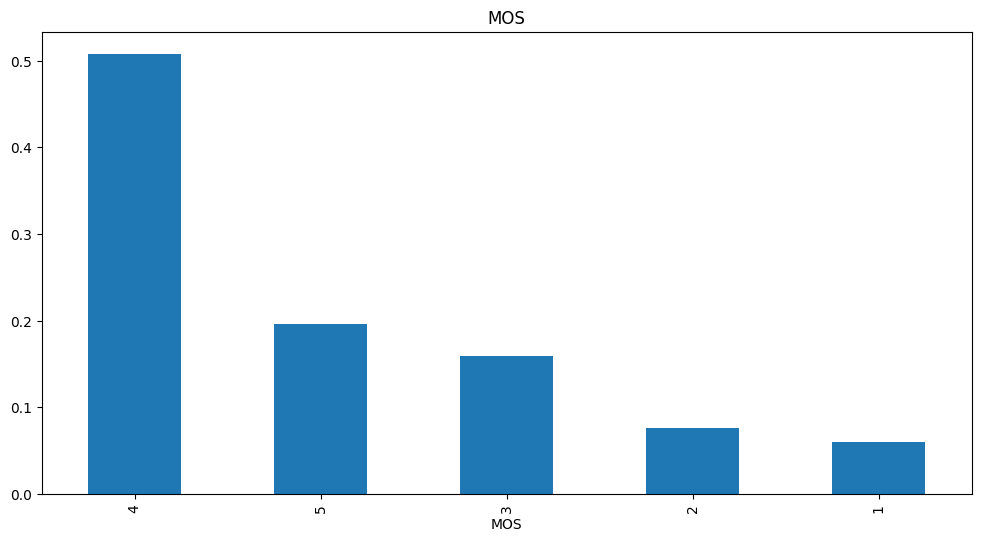

In [16]:
# let's see the distribution of the target variable
df['MOS'].value_counts(normalize=True)

# let's see the distribution of the target variable
df['MOS'].value_counts(normalize=True).plot.bar(figsize=(12,6), title= 'MOS')



Here are my thoughts on the class distribution above:

1. MOS scores are fairly evenly distributed across the different classes from Bad (MOS 1) to Excellent (MOS 5) quality. This is good to have representations of all perception levels.

2. The dataset is still imbalanced with many more samples for the higher quality scores:
    - Highest number of samples in Good (MOS 4) class
    - Least number of samples in Bad (MOS 1) class

3. The imbalance ratio seems moderate but not highly skewed. Highest to lowest class ratio is:
    - 784/93 = 8.4x (MOS 4 / MOS 1)

4. We could consider oversampling minority classes or undersampling majority classes as part of data preprocessing to balance it further.

In summary, there is class imbalance present but not severely. I would recommend some sampling strategies to mitigate it so machine learning models do not get biased towards predicting only the dominant classes. We need sufficient samples across all classes for robust video QoE modeling.


## we will have to work on this class imbalance issue later on in the project since we have to separate the data into training and testing sets first to do that.(either oversampling or undersampling)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   QoA_VLCresolution   1543 non-null   int64  
 1   QoA_VLCbitrate      1543 non-null   float64
 2   QoA_VLCframerate    1543 non-null   float64
 3   QoA_VLCdropped      1543 non-null   int64  
 4   QoA_VLCaudiorate    1543 non-null   float64
 5   QoA_VLCaudioloss    1543 non-null   int64  
 6   QoA_BUFFERINGcount  1543 non-null   int64  
 7   QoA_BUFFERINGtime   1543 non-null   int64  
 8   QoS_type            1543 non-null   int64  
 9   QoS_operator        1543 non-null   int64  
 10  QoD_model           1543 non-null   object 
 11  QoD_os-version      1543 non-null   object 
 12  QoD_api-level       1543 non-null   int64  
 13  QoU_sex             1543 non-null   int64  
 14  QoU_age             1543 non-null   int64  
 15  QoU_Ustedy          1543 non-null   int64  
 16  QoF_be

# now we will have to do some data preprocessing to make the data ready for modeling
starting with the categorical features ( we will have to convert them to numerical features)
so that we can finally use them in our models or even run a correlation analysis on them



In [18]:
# let's see what the two string columns look like
df['QoD_model'].unique()

array(['HTC One X+', 'GT-I9195', 'GT-I9300', 'D5803', 'SM-G900F',
       'ARCHOS 101G9', 'HTC One_M8', 'Nexus 4', 'SM-N9005', 'GT-I9191',
       'GT-I9192', 'D5802', 'GT-I9189', 'GT-I9194', 'GT-I9193'],
      dtype=object)

The attribute `QoD_model` refers to the specific model of mobile device used during the video streaming sessions as per the dataset documentation. 

The array of values we have called indicates there were 15 unique mobile device models that were used for crowdsourced testing of video Quality of Experience (QoE) by the 181 users.

Some observations:

- Many models seem to be Samsung Galaxy phones (GT-XXXX) and Sony Xperia phones (DXXXX)
- Mix of high-end (Galaxy S, HTC One), mid-range (Xperia) and low-end (Archos) phones
- Different OS platforms - Android (Samsung, Sony, Nexus), Windows (Archos)
- Range of phone form factors - Smartphones & tablets (Archos 101 tablet)

Having such diversity of devices is useful to evaluate if mobile device characteristics have an impact on perceived video streaming quality.

As part of data preprocessing, we could:

- Assign device performance tiers based on their specs (high, mid, low end) 
- Group by OS platforms
- Create variables for form factor (phone vs tablet)

These additional attributes derived from QoD_model can help correlate device quality with video QoE scores given by users. They may explain some variability in MOS ratings.

In summary, the QoD_model attribute provides a rich set of device information that can be used to analyze the impact of mobile device characteristics on video streaming quality. So, surely it is a useful attribute to have in the dataset.

For us to turn the object type of the column `QoD_model` into a numerical type, we can use the `LabelEncoder` from the `sklearn.preprocessing` module.



In [19]:
#let's encode QoD_model column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['QoD_model'] = le.fit_transform(df['QoD_model'])



In [20]:
#let's see QoD_model column after encoding
df['QoD_model'].unique()

array([10,  8,  9,  2, 13,  0, 11, 12, 14,  4,  5,  1,  3,  7,  6])

In [21]:
#after the label_encoding , let's see if which number is assigned to which category
le.classes_

array(['ARCHOS 101G9', 'D5802', 'D5803', 'GT-I9189', 'GT-I9191',
       'GT-I9192', 'GT-I9193', 'GT-I9194', 'GT-I9195', 'GT-I9300',
       'HTC One X+', 'HTC One_M8', 'Nexus 4', 'SM-G900F', 'SM-N9005'],
      dtype=object)

# Another categorical feature that we will have to convert to numerical is the `QoD_os-version` feature

In [22]:
#nice that looks good, but let's also encode the other string column
df['QoD_os-version'].unique()

array(['4.1.1(122573.16)', '4.4.2(I9195XXUCNK1)', '4.1.2(I9300XXELL4)',
       '4.4.4(suv3Rw)', '4.4.2(G900FXXU1ANG2)', '4.0.4(20130118.175432)',
       '4.4.2(G900FXXU1ANJ1)', '4.4.2(I9195XXUCNK4)', '5.0.1(457188.4)',
       '5.0.1(1602158)', '4.3(I9300XXUGNB5)', '5.0(G900FXXU1BOC7)',
       '4.3(I9506XXUBML5)', '5.1.1(456c49d1b2)', '5.0(G900FXXU1BOC2)',
       '4.4.2(N9005XXUGNI4)', '5.1.1(478106bf5f)', '4.4.2(G900FXXU1ANG9)'],
      dtype=object)

The `QoD_os-version` attribute refers to the operating system version installed on the mobile devices used for video streaming in the crowdsourced test.

The array of values indicates there were 18 unique OS versions across the different phones and tablets used.

A few key observations:

- Most are Android OS versions given the convention of the strings. Versions range from older 4.0 to newer 5.1.
- There are some device manufacturer/model specific firmware versions like Samsung's XXELL4 firmware.
- The OS versions correspond to the phones we saw under QoD_model like Galaxy S5, Xperia, etc.
- Some OS versions have patch levels also specified like 4.1.1 or security patch dates.

Such diversity of OS versions and their evolution over time can impact factors like:

- Device performance - processing, graphics, battery life
- Default app behaviors and settings
- Underlying driver and framework changes

These differences could influence quality perceptions during video streaming across user devices.

For modeling, we need to preprocess this data to extract the core OS version (4.1, 5.0) and possibly normalize the patch numbering. Categorization of versions by age may also help correlate with MOS.


<u>since there are 18 unique values, we have got to be careful while encoding this column</u>

I would follow " the traditional group them together and encode tactics" To preprocess the OS version data:

1. Extract Core OS Version
   - For each version string, extract the main OS version by parsing the number before the first decimal point.
   - So "5.1.1(478106bf5f)" becomes "5.1"
   
2. Bin Versions
   - Group versions into bins based on release timeframe:
     - Older than 4.4 -> "Old"
     - 4.4 to 5.0 -> "Intermediate"
     - Above 5.0 -> "New"
     
3. Label Encode
   - Assign numeric labels to these bins:
     - Old = 0
     - Intermediate = 1
     - New = 2

4. Use Encoded Column
   - Include this new numeric OS version encoding in prediction models.
  
Key Benefits:

- Reduces sparsity of many unique but similar versions 
- Generalizes OS based on age rather than minor differences  
- Simplifies modeling and identifying trends

Additionally, we can extract specific metadata like security patch date where available. That may show impact of device updates on video streaming QoE.


In [23]:
#1. Extract Core OS Version
 #For each version string, extract the main OS version by parsing the number before the first decimal point.
#So "5.1.1(478106bf5f)" becomes "5.1"

#let's create a function to extract the core os version we will take the two first numbers
def extract_core_os_version(string):
    return string[:3]

#let's apply the function to the column
df['QoD_os-version'] = df['QoD_os-version'].apply(extract_core_os_version)

#let's see the unique values of the column
df['QoD_os-version'].unique()


array(['4.1', '4.4', '4.0', '5.0', '4.3', '5.1'], dtype=object)

In [24]:
# let's Bin Versions
# Group versions into bins based on release timeframe:
# Older than 4.4 -> "Old"
#4.4 to 5.0 -> "Intermediate"
#Above 5.0 -> "New"

#let's create a function to bin the versions
def bin_versions(version):
    if float(version) < 4.4:
        return "Old"
    elif float(version) < 5.0:
        return "Intermediate"
    else:
        return "New"
    
#let's apply the function to the column
df['QoD_os-version'] = df['QoD_os-version'].apply(bin_versions)


In [25]:
df.head()

,QoA_VLCresolution,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,QoS_type,QoS_operator,...,QoD_os-version,QoD_api-level,QoU_sex,QoU_age,QoU_Ustedy,QoF_begin,QoF_shift,QoF_audio,QoF_video,MOS
0,360,528.39294,24.950000,0,43.800000,0,2,683,4,2,...,Old,16,1,20,5,3,5,3,4,3
1,360,402.64664,30.066667,0,44.200000,0,2,690,5,4,...,Intermediate,19,1,25,5,4,5,5,5,5
2,360,735.84070,24.200000,0,44.183333,0,2,840,2,2,...,Old,16,1,22,5,3,5,4,4,4
3,240,529.48830,24.116667,9,43.850000,0,2,868,2,2,...,Intermediate,19,1,31,5,4,5,5,5,5
4,360,736.00085,24.066667,0,43.850000,0,2,869,4,4,...,Old,16,0,26,5,5,5,4,5,5


In [26]:
#Label Encode
#Assign numeric labels to these bins:
#Old = 0
#Intermediate = 1
#New = 2

#let's encode the column
df['QoD_os-version'] = le.fit_transform(df['QoD_os-version'])

#let's see the unique values of the column
df['QoD_os-version'].unique()

array([2, 0, 1])

In [27]:
#let's see the classes
le.classes_


array(['Intermediate', 'New', 'Old'], dtype=object)

In [28]:
#now let's see if there's still any string column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   QoA_VLCresolution   1543 non-null   int64  
 1   QoA_VLCbitrate      1543 non-null   float64
 2   QoA_VLCframerate    1543 non-null   float64
 3   QoA_VLCdropped      1543 non-null   int64  
 4   QoA_VLCaudiorate    1543 non-null   float64
 5   QoA_VLCaudioloss    1543 non-null   int64  
 6   QoA_BUFFERINGcount  1543 non-null   int64  
 7   QoA_BUFFERINGtime   1543 non-null   int64  
 8   QoS_type            1543 non-null   int64  
 9   QoS_operator        1543 non-null   int64  
 10  QoD_model           1543 non-null   int32  
 11  QoD_os-version      1543 non-null   int32  
 12  QoD_api-level       1543 non-null   int64  
 13  QoU_sex             1543 non-null   int64  
 14  QoU_age             1543 non-null   int64  
 15  QoU_Ustedy          1543 non-null   int64  
 16  QoF_be

# finally we can calculate the correlation between the features and the target variable `MOS` to see which features are more important than others

```python

In [29]:
#let's see the correlation of the columns with the target variable
df.corr()['MOS'].sort_values()


QoA_BUFFERINGtime    -0.482378
QoA_BUFFERINGcount   -0.411176
QoA_VLCaudioloss     -0.323338
QoA_VLCdropped       -0.237135
QoD_os-version       -0.165904
QoU_age              -0.039230
QoD_model            -0.036137
QoA_VLCresolution    -0.022485
QoS_operator          0.048154
QoU_Ustedy            0.055831
QoU_sex               0.062251
QoA_VLCbitrate        0.089671
QoD_api-level         0.133560
QoS_type              0.146741
QoA_VLCaudiorate      0.353631
QoA_VLCframerate      0.544164
QoF_begin             0.591324
QoF_shift             0.634058
QoF_video             0.689358
QoF_audio             0.840735
MOS                   1.000000
Name: MOS, dtype: float64

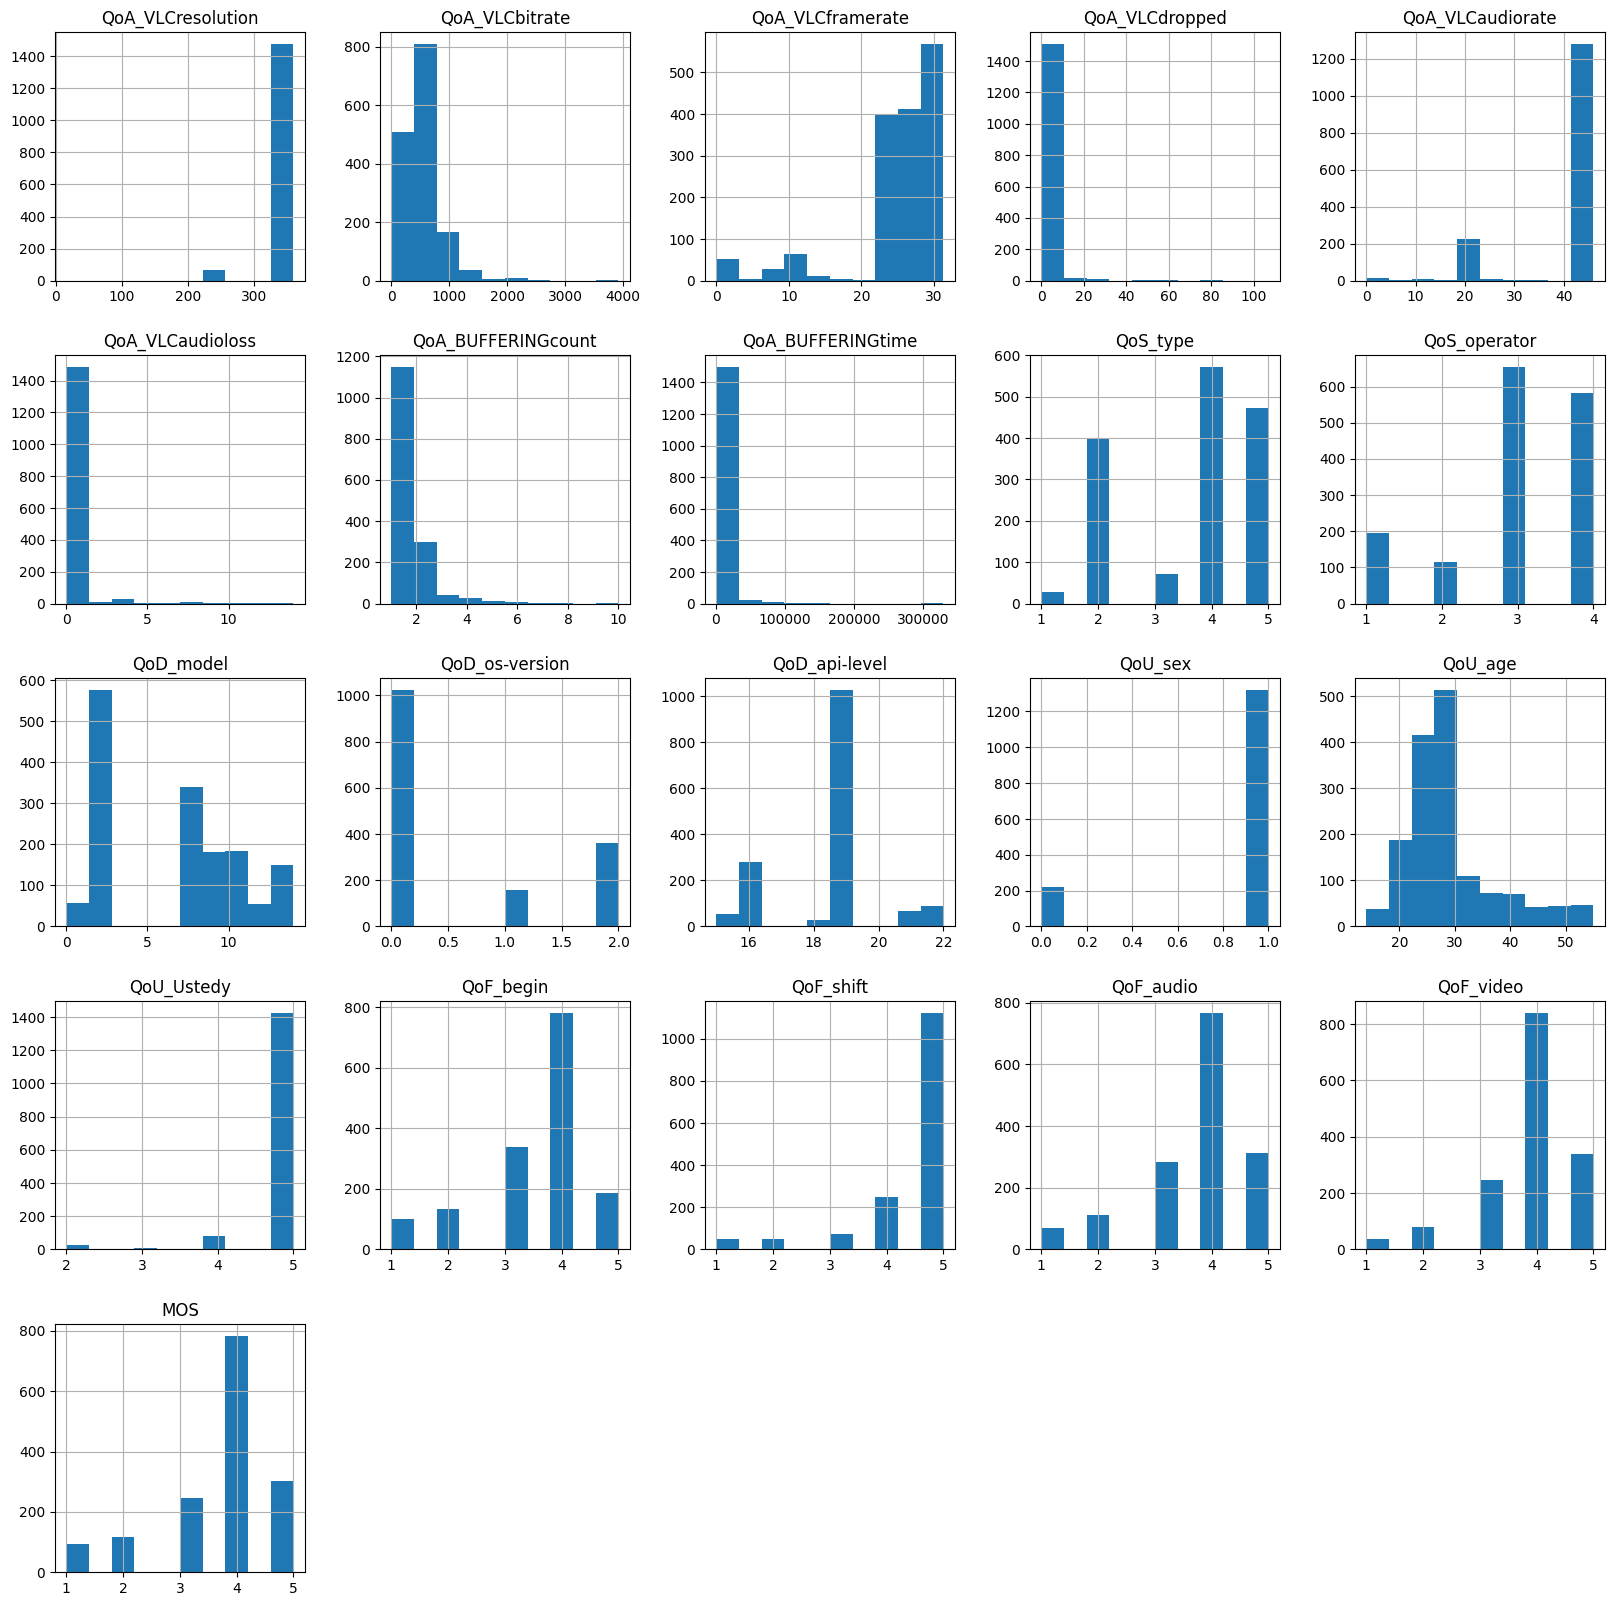

In [30]:
# let's see some histograms to understand the distribution of the columns
df.hist(figsize=(20,20))
plt.show()


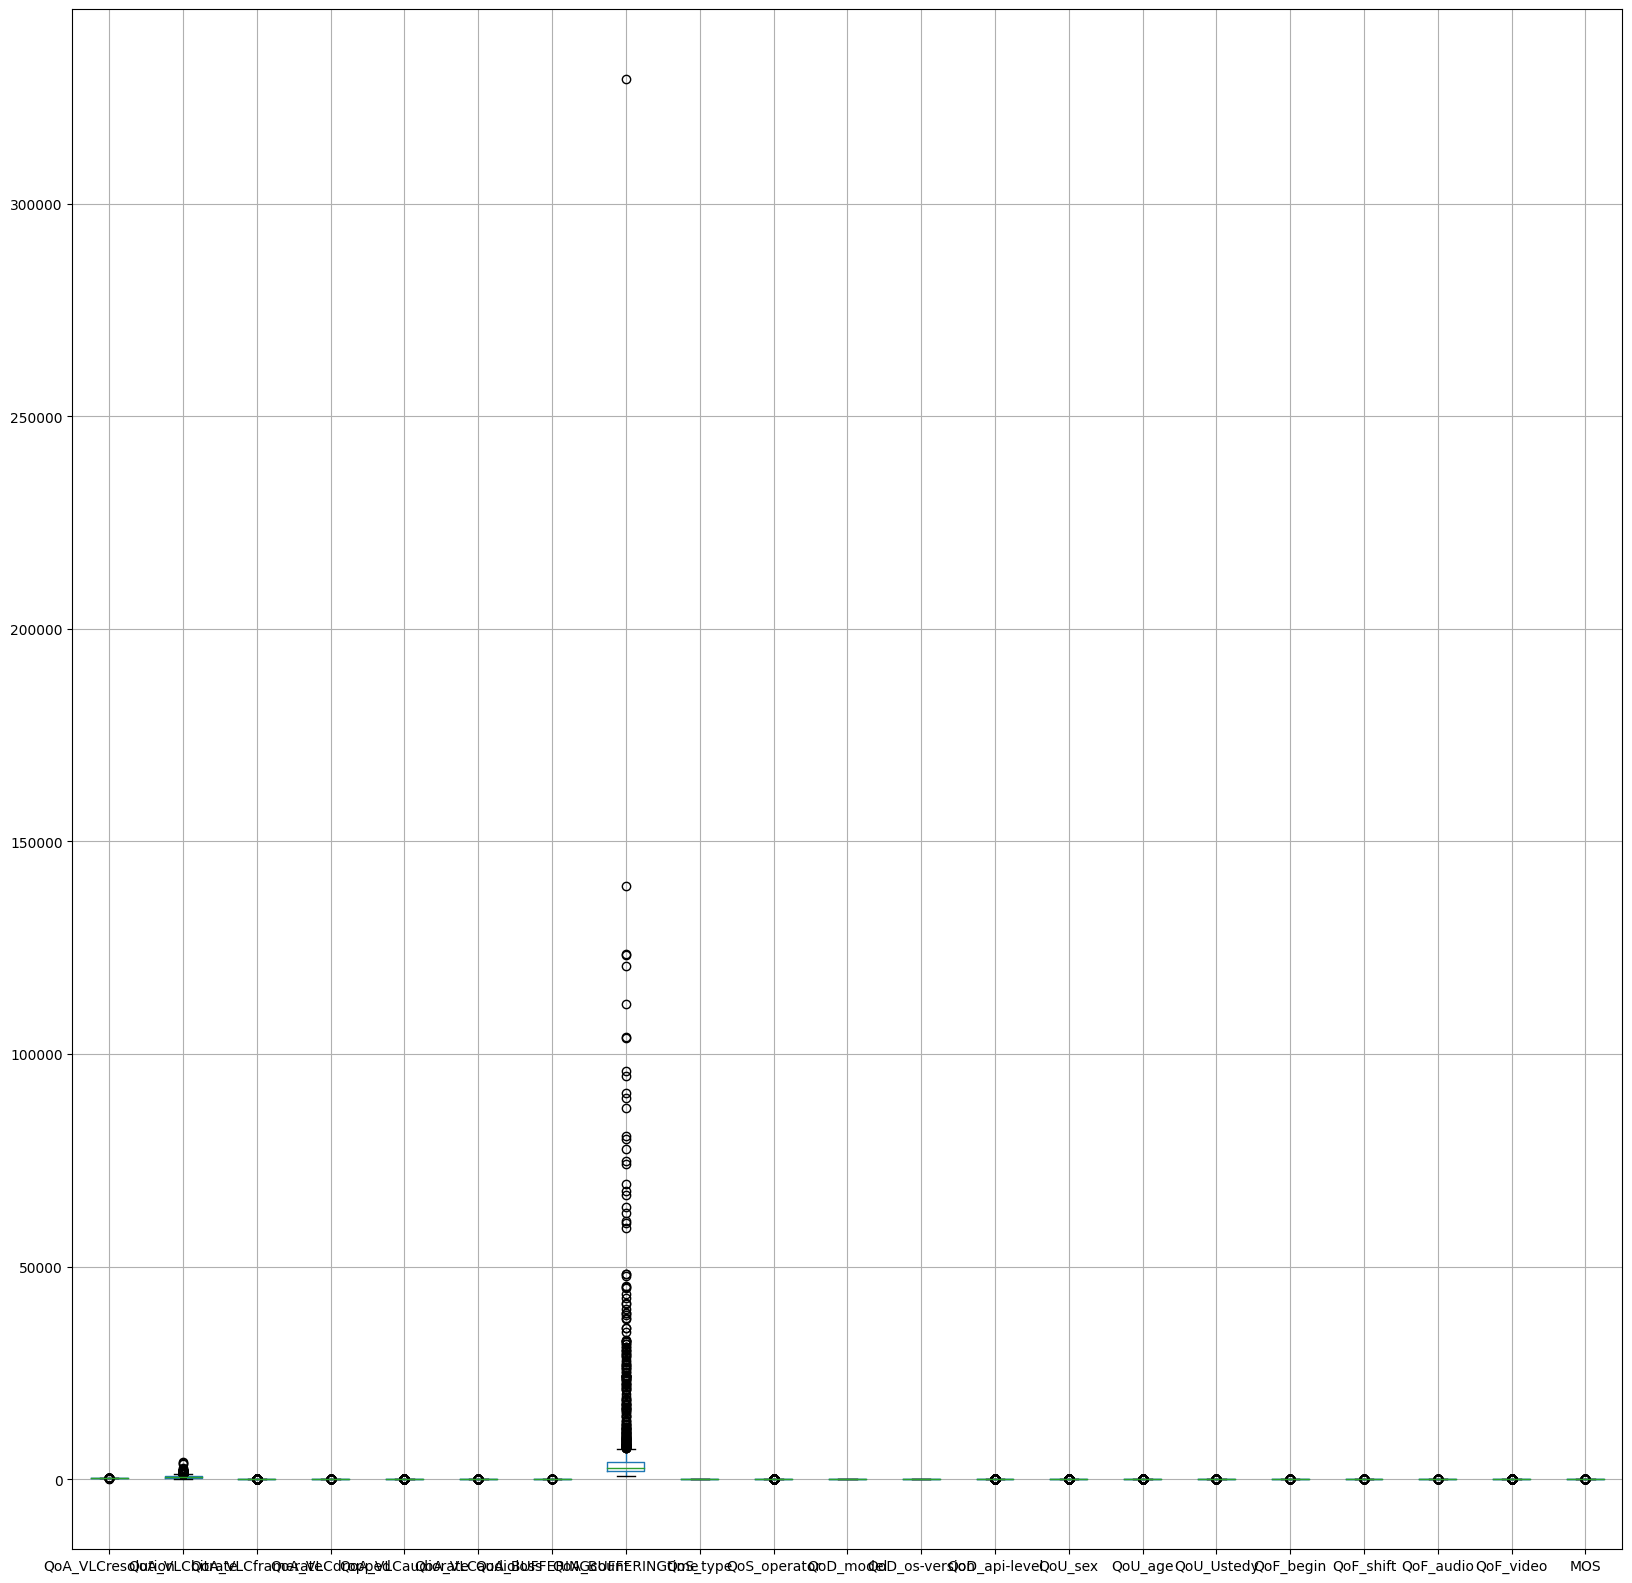

In [31]:
# let's see some boxplots to understand the distribution of the columns
df.boxplot(figsize=(20,20))
plt.show()

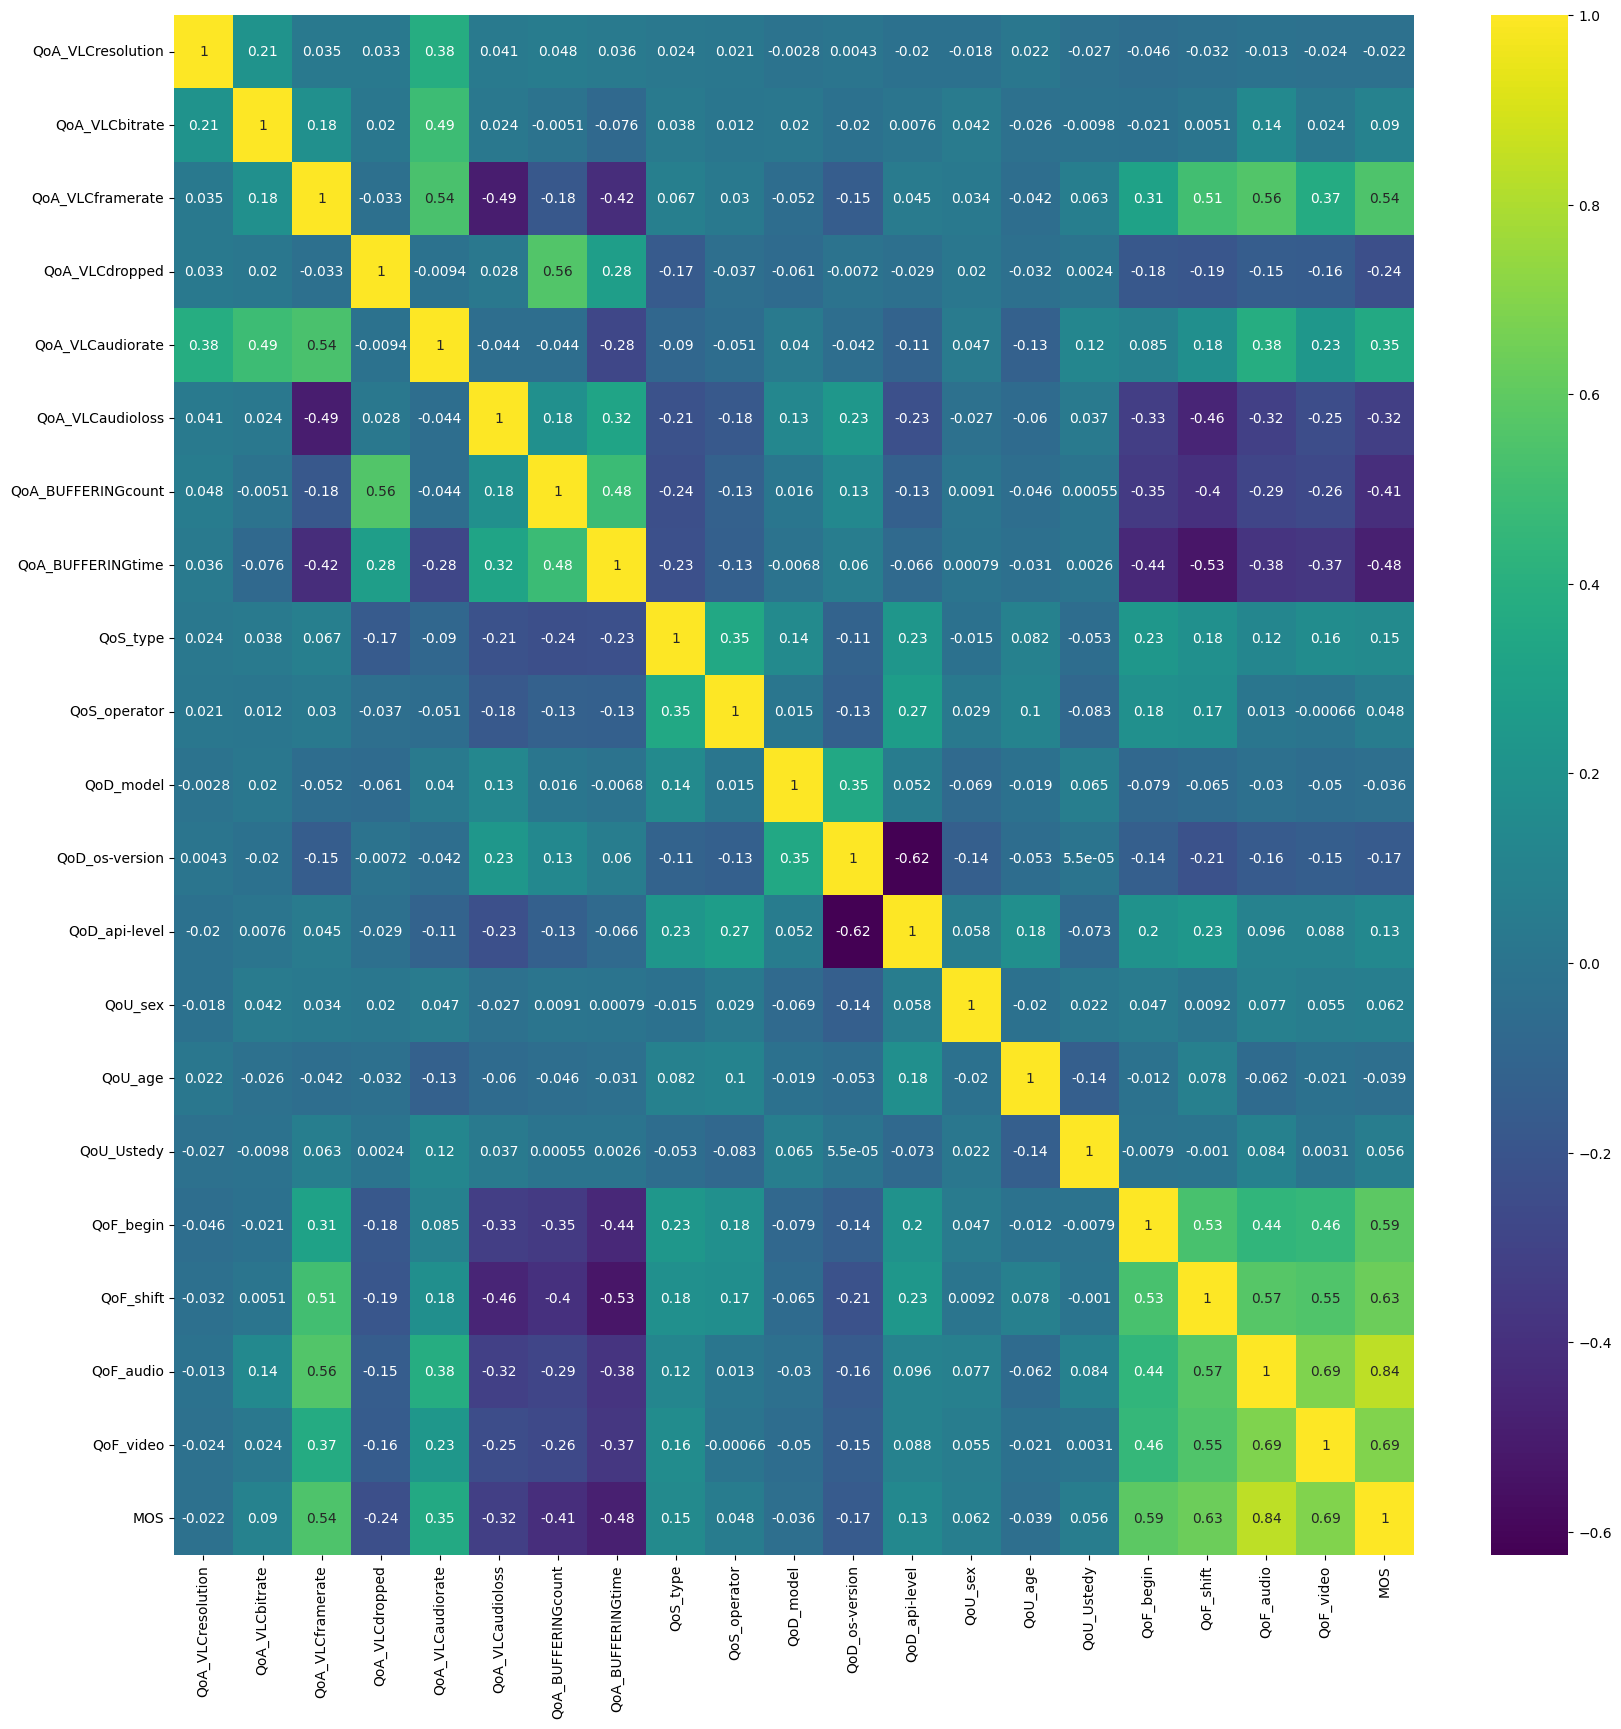

In [32]:
# let's see the heatmap of the correlation of the columns
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

User segmentation by quality of experience (QoE) patterns is a valuable analysis technique for this dataset. 
Here is how we should get started:

1. Feature Selection
   - Identify columns relating to user feedback, perceptions (QoF_*) 
   - Add relevant params like video quality, stall events etc.

2. Clustering 
   - Apply K-Means clustering to group users based on selected features
   - Determine optimal clusters (K) through elbow plot method 

3. Analyze Clusters
   - Profile each cluster segregated by QoE patterns
     e.g. Cluster 1 - High quality, low stalls

   - Compare cluster-level statistics for distribution of ratings, events faced etc.  

4. Validate Clusters
   - Check if cluster assignments correlate to overall MOS groups
   - For example, a "bad QoE" cluster should have lower MOS scores

Key Outcomes:
- User subgroups based on their subjective QoE evaluations  
- Tailored enhancements to address issues faced per each profile
- Targeted marketing and promotions to specific user segments
- Better understanding of user behavior and preferences
- Insights into factors impacting QoE for different user groups



In [33]:
# let's start wih Feature selection
# we have to identify the columns relating to user feedback , perceptions and quality of experience
#add relevant columns like video quality, stall events, etc. to the feature set

#let's see the columns again
df.columns

Index(['QoA_VLCresolution', 'QoA_VLCbitrate', 'QoA_VLCframerate',
       'QoA_VLCdropped', 'QoA_VLCaudiorate', 'QoA_VLCaudioloss',
       'QoA_BUFFERINGcount', 'QoA_BUFFERINGtime', 'QoS_type', 'QoS_operator',
       'QoD_model', 'QoD_os-version', 'QoD_api-level', 'QoU_sex', 'QoU_age',
       'QoU_Ustedy', 'QoF_begin', 'QoF_shift', 'QoF_audio', 'QoF_video',
       'MOS'],
      dtype='object')

In [34]:
#for user segment, we will use the columns QoU_Ustedy,QoU_sexx,QoU_age and turn them into our Y variable so that we can use k-means clustering
#let's create a new dataframe for the user segment
df_user_segment = df[['QoU_Ustedy','QoU_sex','QoU_age']]
df_user_segment.head()



,QoU_Ustedy,QoU_sex,QoU_age
0,5,1,20
1,5,1,25
2,5,1,22
3,5,1,31
4,5,0,26


In [35]:
#let's see the unique values of the columns
df_user_segment['QoU_Ustedy'].unique()

array([5, 4, 2, 3], dtype=int64)

In [36]:
#let's see the unique values of the columns
df_user_segment['QoU_sex'].unique()

array([1, 0], dtype=int64)

In [37]:
#let's see the unique values of the columns
df_user_segment['QoU_age'].unique()

array([20, 25, 22, 31, 26, 29, 33, 19, 37, 18, 21, 44, 30, 27, 38, 17, 24,
       23, 34, 41, 28, 52, 39, 45, 50, 36, 47, 55, 42, 40, 49, 32, 35, 43,
       53, 54, 14, 48], dtype=int64)

In [38]:
#let's how many y-lables we can come up with the combination of these three columns
#we have to set certain thresholds and divide the users into different segments/demographics based on these thresholds
#let's see the number of unique values of the columns
print(df_user_segment['QoU_Ustedy'].nunique())


4


In [39]:
#let's see the number of unique values of the columns
print(df_user_segment['QoU_sex'].nunique())

2


In [40]:
#let's see the number of unique values of the columns
print(df_user_segment['QoU_age'].nunique())

38


since there are 3 separate columns related to users - education, gender and age. 

To perform user segmentation through clustering, we need to consolidate them into representative user groups.

Here is one approach to achieve that:

1. Encode Categorical Columns -which we have already done !
2. Encode gender and education level into numeric formats
which we have already done !

Derive User Type
Bucket age groups (teenagers, youth, middle-aged etc)
Combine above 3 columns into a categorical user type column e.g. "Female College-aged User"
This is necessary to cluster users based on their profiles


One Hot Encode
Generate binary columns for each user type
This will result in a user vector for each sample e.g.
[1, 0, 0] for a male young professional
[0, 1, 0] for a female college student
this is next step!

Cluster User Vectors
Use KMeans/Hierarchical clustering on this user type vector
Analyze clusters to profile user segments
Essentially we need to transform the 3 categorical columns into a unified user category encoding before clustering.

User Education Levels:
- 5 -> University  
- 4 -> Secondary school
- 3 -> College
- 2 -> Primary School

User Ages:
- 14-25 -> Youth
- 26-35 -> Young Adult
- 36-50 -> Middle Aged
- 51-55 -> Mature

Some sample user types:

1. Male College Youth
   (Education: 3, Gender: Male, Age: 22)

2. Female Secondary School Young Adult 
   (Education: 4, Gender: Female, Age: 29)

3. Male University Middle Aged
   (Education: 5, Gender: Male, Age: 44)

4. Female Primary School Mature
   (Education: 2, Gender: Female, Age: 55) 

As you suggested we can tightly couple the education levels and bucket the ages into segments. This results in interpretable user types crossing age, education and gender.



In [41]:
#Derive User Type
#Bucket age groups (teenagers, youth, middle-aged etc)
#Combine above 3 columns into a categorical user type column e.g. "Female College-aged User"
#This is necessary to cluster users based on their profiles
#User Ages:
#- 14-25 -> Youth
#- 26-35 -> Young Adult
#- 36-50 -> Middle Aged
#- 51-55 -> Mature

#let's create a function to bucket the ages
def bucket_ages(age):
    if age < 26:
        return "Youth"
    elif age < 36:
        return "Young Adult"
    elif age < 51:
        return "Middle Aged"
    else:
        return "Mature"
    
#let's apply the function to the column
df_user_segment['QoU_age'] = df_user_segment['QoU_age'].apply(bucket_ages)

#let's see the unique values of the column
df_user_segment['QoU_age'].unique()




array(['Youth', 'Young Adult', 'Middle Aged', 'Mature'], dtype=object)

In [42]:
#let's see the unique values of the column
df_user_segment['QoU_age'].unique()


array(['Youth', 'Young Adult', 'Middle Aged', 'Mature'], dtype=object)

In [43]:
#let's encode them using LabelEncoder
df_user_segment['QoU_age'] = le.fit_transform(df_user_segment['QoU_age'])

In [44]:
#let's see the unique values of the column
df_user_segment['QoU_age'].unique()

array([3, 2, 1, 0])

In [45]:
#let's see the classes
le.classes_

array(['Mature', 'Middle Aged', 'Young Adult', 'Youth'], dtype=object)

In [46]:
#let's see the distribution of the column
df_user_segment['QoU_age'].value_counts()


QoU_age
2    811
3    475
1    210
0     47
Name: count, dtype: int64

<AxesSubplot:title={'center':'QoU_age'}, xlabel='QoU_age'>

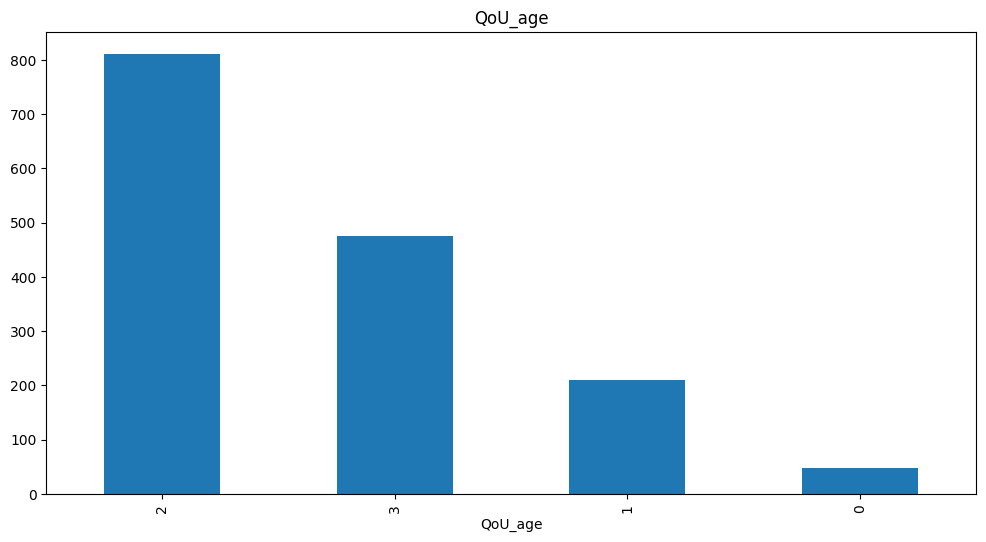

In [47]:
#let's visualize the distribution of the column
df_user_segment['QoU_age'].value_counts().plot.bar(figsize=(12,6), title= 'QoU_age')


middle-age, mature, young adult, youth

<AxesSubplot:title={'center':'QoU_Ustedy'}, xlabel='QoU_Ustedy'>

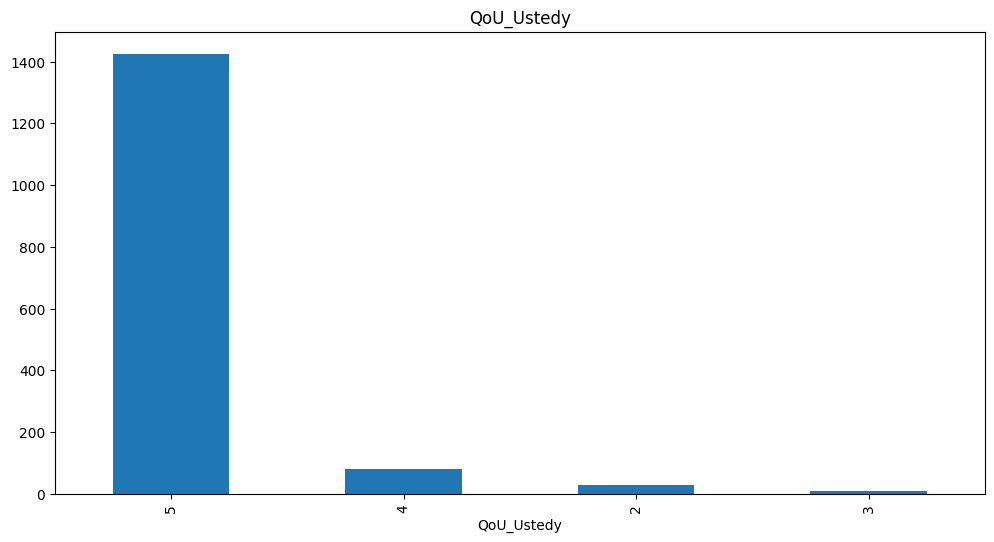

In [51]:
#let's see the distribution of the education column
df_user_segment['QoU_Ustedy'].value_counts()

#let's visualize the distribution of the education column
df_user_segment['QoU_Ustedy'].value_counts().plot.bar(figsize=(12,6), title= 'QoU_Ustedy')



User Education Levels:
- 5 -> University  
- 4 -> Secondary school
- 3 -> College
- 2 -> Primary School

<AxesSubplot:title={'center':'QoU_sex'}, xlabel='QoU_sex'>

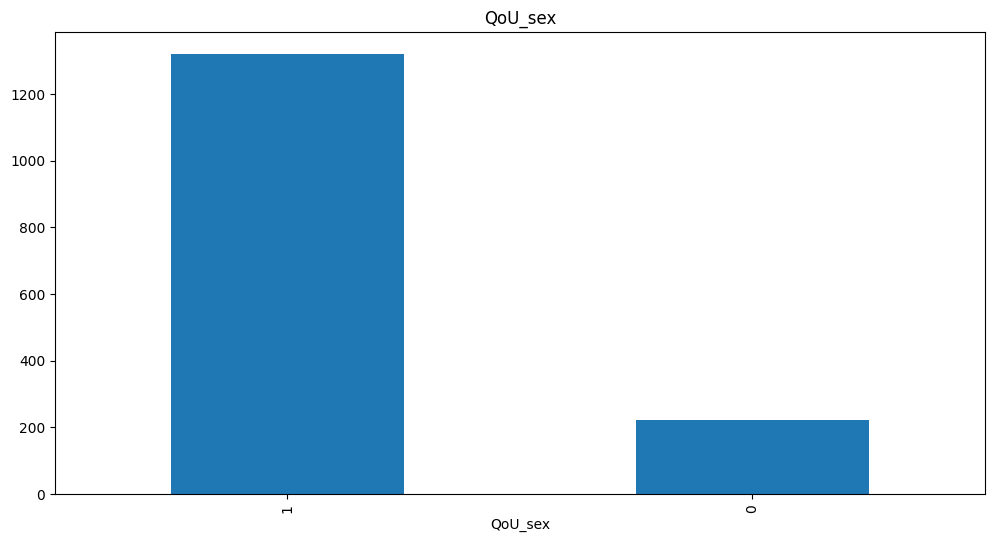

In [53]:
# let's do the same for Qou_sex column

#let's see the distribution of the column
df_user_segment['QoU_sex'].value_counts()

#let's visualize the distribution of the column
df_user_segment['QoU_sex'].value_counts().plot.bar(figsize=(12,6), title= 'QoU_sex')

0 -> Woman

• 1 -> man

In [54]:
#let see our data again
df_user_segment.head()

,QoU_Ustedy,QoU_sex,QoU_age
0,5,1,3
1,5,1,3
2,5,1,3
3,5,1,2
4,5,0,2


In [56]:
#let's drop the column sex since it's not required

df_user_segment.drop(['QoU_sex'],axis=1,inplace=True)


In [57]:
#let's see our data again
df_user_segment.head()



,QoU_Ustedy,QoU_age
0,5,3
1,5,3
2,5,3
3,5,2
4,5,2


In [58]:
#let;s see the shape
df_user_segment.shape


(1543, 2)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters


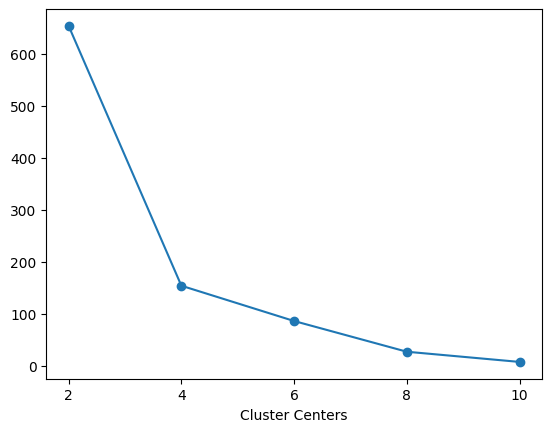

In [59]:
#NOW IT'S TIME TO CLUSTER THE USERS
#let's import the libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#let's create a function to find the optimal number of clusters
def find_optimal_clusters(dataframe, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
                     .fit(dataframe).inertia_)
        print('Fit {} clusters'.format(k))

    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)


#let's apply the function to our dataframe
find_optimal_clusters(df_user_segment, 10)


In [64]:
#let's calculate the silhouette score of all the clusters
silhouette_scores = []
for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(df_user_segment, KMeans(n_clusters = n_cluster).fit_predict(df_user_segment)))
    

#print the silhouette scores according to the number of clusters

for i in range(0,len(silhouette_scores)):
    print("Silhouette score for {} clusters is {}".format(i+2,silhouette_scores[i]))



Silhouette score for 2 clusters is 0.6924332019641712
Silhouette score for 3 clusters is 0.8272258113459875
Silhouette score for 4 clusters is 0.8845076863548125
Silhouette score for 5 clusters is 0.9081044547690832
Silhouette score for 6 clusters is 0.9154515376332316
Silhouette score for 7 clusters is 0.9461853082902784


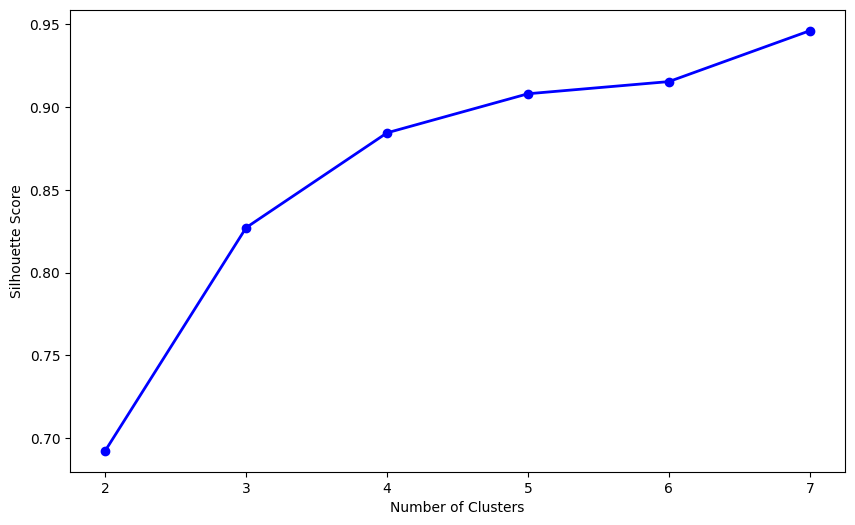

In [65]:
#let's plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 8), silhouette_scores, linewidth=2, marker='o', color='blue')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [66]:
# we will choose 4 clusters since it is the elbow point and also the silhouette score is the highest for 4 clusters
#let's create the model with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_user_segment)

#let's see the labels of the clusters
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [67]:
#let's see the unique values of the labels
np.unique(kmeans.labels_)

array([0, 1, 2, 3])

In [69]:
#let's see the shape of the labels
kmeans.labels_.shape 


(1543,)

In [70]:
#let's add the labels to the dataframe
df_user_segment['labels'] = kmeans.labels_

In [71]:
#let's see the first 5 rows of the dataframe
df_user_segment.head()

,QoU_Ustedy,QoU_age,labels
0,5,3,1
1,5,3,1
2,5,3,1
3,5,2,0
4,5,2,0


In [72]:
#let's see the distribution of the labels
df_user_segment['labels'].value_counts()

labels
0    811
1    458
2    237
3     37
Name: count, dtype: int64

<AxesSubplot:title={'center':'labels'}, xlabel='labels'>

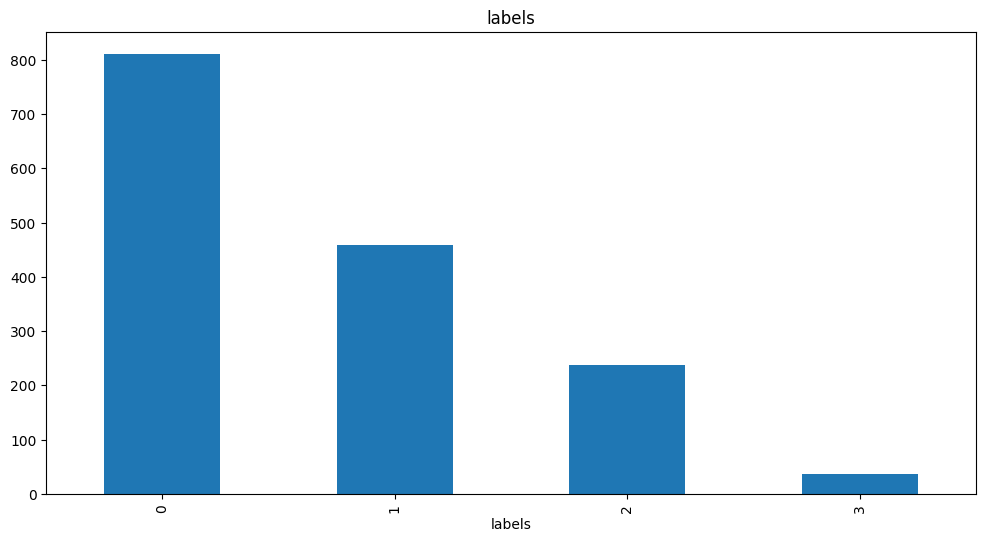

In [73]:
#let's visualize the distribution of the labels
df_user_segment['labels'].value_counts().plot.bar(figsize=(12,6), title= 'labels')


In [74]:
#let's see the unique values of the labels
df_user_segment['labels'].unique()

array([1, 0, 2, 3])

In [75]:
#let's see what they represent in terms of the user segment
df_user_segment[df_user_segment['labels']==0]

,QoU_Ustedy,QoU_age,labels
3,5,2,0
4,5,2,0
5,5,2,0
6,5,2,0
7,5,2,0
...,...,...,...
1538,5,2,0
1539,5,2,0
1540,5,2,0
1541,5,2,0


In [76]:
#let's see what they represent in terms of the user segment
df_user_segment[df_user_segment['labels']==1]


,QoU_Ustedy,QoU_age,labels
0,5,3,1
1,5,3,1
2,5,3,1
9,5,3,1
12,5,3,1
...,...,...,...
1527,5,3,1
1530,5,3,1
1532,5,3,1
1534,5,3,1


In [77]:
#let's see what they represent in terms of the user segment
df_user_segment[df_user_segment['labels']==2]

,QoU_Ustedy,QoU_age,labels
10,5,1,2
11,5,1,2
20,5,1,2
29,4,1,2
34,5,1,2
...,...,...,...
1504,5,0,2
1505,5,1,2
1512,5,1,2
1521,4,1,2


In [78]:
#let's see what they represent in terms of the user segment
df_user_segment[df_user_segment['labels']==3]


,QoU_Ustedy,QoU_age,labels
237,2,3,3
264,2,3,3
300,2,1,3
339,2,3,3
363,3,1,3
391,2,3,3
473,2,3,3
516,2,1,3
547,3,1,3
582,2,3,3


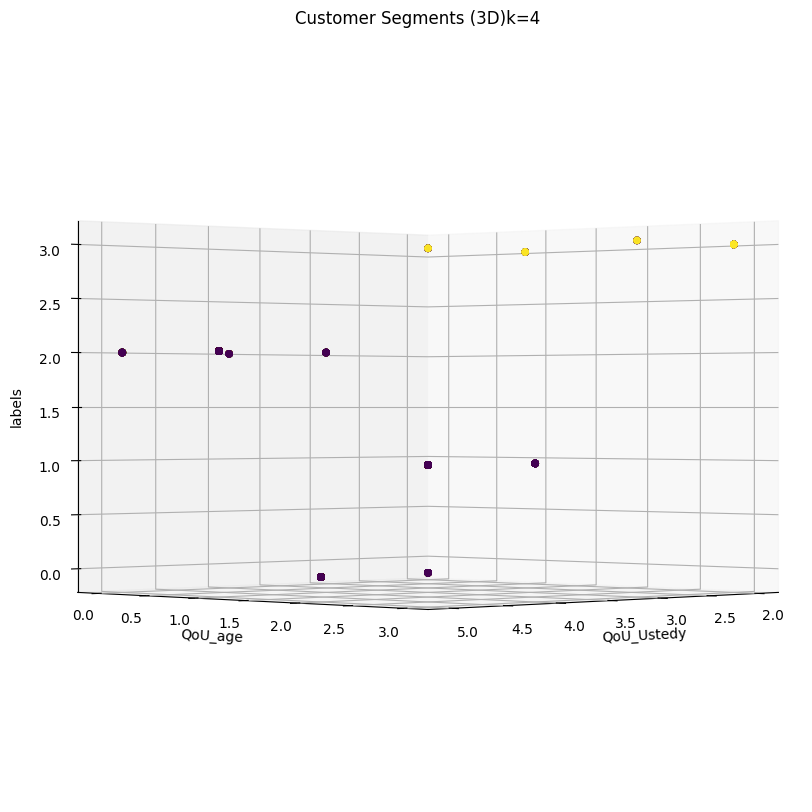

In [101]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_user_segment['QoU_Ustedy'], df_user_segment['QoU_age'], df_user_segment['labels'], c=df_user_segment['labels']==0, cmap='viridis')
ax.scatter(df_user_segment['QoU_Ustedy'], df_user_segment['QoU_age'], df_user_segment['labels'], c=df_user_segment['labels']==1, cmap='viridis')
ax.scatter(df_user_segment['QoU_Ustedy'], df_user_segment['QoU_age'], df_user_segment['labels'], c=df_user_segment['labels']==2, cmap='viridis')
ax.scatter(df_user_segment['QoU_Ustedy'], df_user_segment['QoU_age'], df_user_segment['labels'], c=df_user_segment['labels']==3, cmap='viridis')


ax.view_init(0, 45)
ax.set_xlabel('QoU_Ustedy')
ax.set_ylabel('QoU_age')
ax.set_zlabel('labels')
plt.title('Customer Segments (3D)k=4')
plt.show()



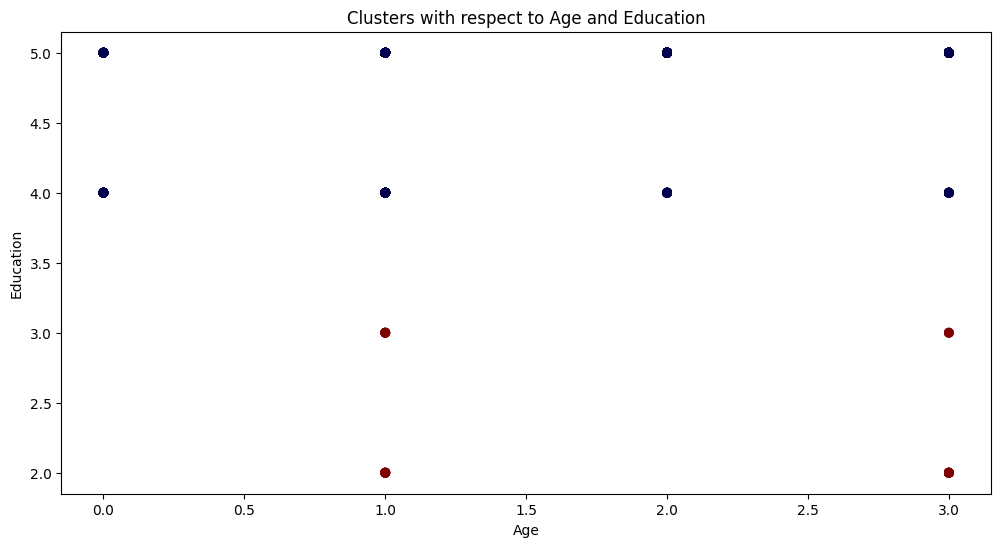

In [92]:
#let's plot the clusters with respect to the age (turn to original values ) and education and our target variable labels but 0,1,2,3
plt.figure(figsize=(12,6))
plt.scatter(df_user_segment['QoU_age'],df_user_segment['QoU_Ustedy'],c=df_user_segment['labels']==0 ,cmap='Blues')
plt.scatter(df_user_segment['QoU_age'],df_user_segment['QoU_Ustedy'],c=df_user_segment['labels']==1 ,cmap='copper')
plt.scatter(df_user_segment['QoU_age'],df_user_segment['QoU_Ustedy'],c=df_user_segment['labels']==2 ,cmap='pink_r')
plt.scatter(df_user_segment['QoU_age'],df_user_segment['QoU_Ustedy'],c=df_user_segment['labels']==3 ,cmap='seismic')
plt.xlabel('Age')
plt.ylabel('Education')
plt.title('Clusters with respect to Age and Education')
plt.show()

